Jose Ramos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

## The above code was used from the starter code. 
## Naiman, J (2021) starter_notebook_for_option2_homework_week02
I used the starter code within my notebook as I needed to use certain fucntions to carry out the task at hand. For example, I used convert_image within my code (I needed to find the common colors of my pictures) and this was a function that was defined within the starter code. 


I have also used many examples from class to create my assignment. I used the class example as my model to figure out the most common colors for my 3 images.

In [2]:
image_path = '/Users/joseramos/Desktop/AlmaMaterSticker.jpg'

In [3]:
im = Image.open(image_path)

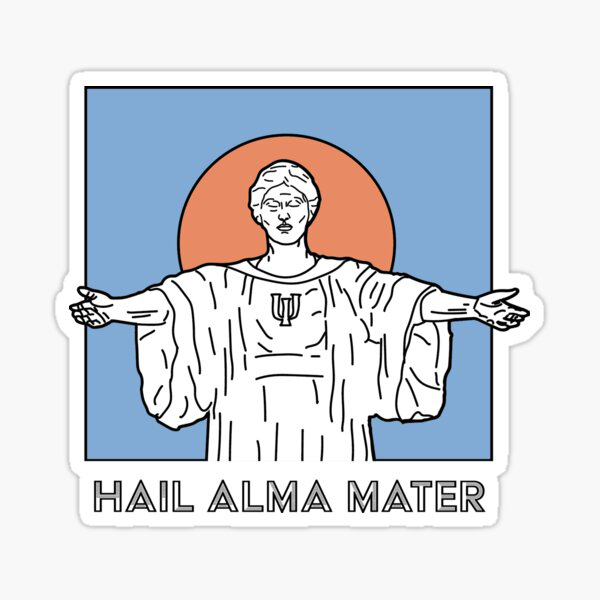

In [4]:
im

In [5]:
#This will find all the colors within the image 
sticker_im,sticker_rgbs = convert_image(im,ncolors = 3)

finding 3 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[248.75477572 248.76371699 248.70684732]
 [121.92051581  82.03760193  67.08002601]
 [132.39437166 170.27334225 208.5342246 ]]


## Here I was able to choose the 3 most common colors from my first image.


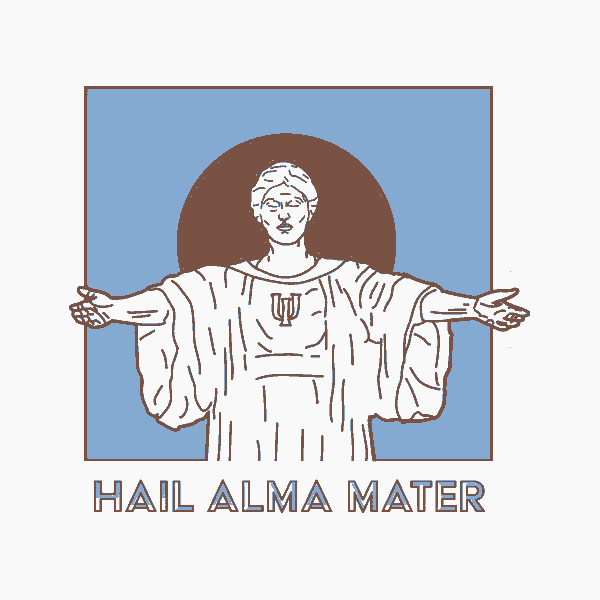

In [6]:
sticker_im

In [7]:
sticker_data = np.array(sticker_im)

In [8]:
np.unique(sticker_data.reshape(-1,sticker_data.shape[2]), axis=0)

array([[122,  82,  67],
       [132, 170, 209],
       [249, 249, 249]], dtype=uint8)

In [9]:
new_im2, new_rgbs2 = convert_image_specific(im, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])

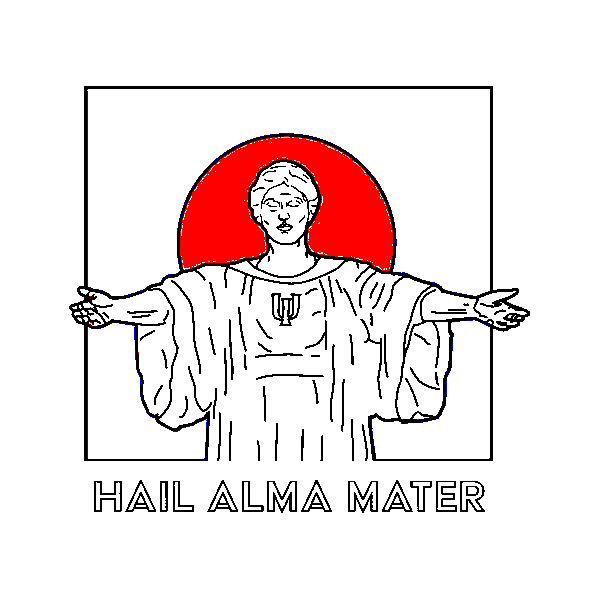

In [10]:
new_im2

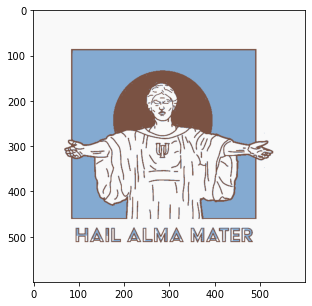

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(sticker_data)
plt.show()

In [12]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(sticker_data.shape[2]):
    print('channel = ', channel_labels[i], ', unique values=', np.unique(sticker_data[:,:,i])) #print out numbers in each channel

channel =  R , unique values= [122 132 249]
channel =  G , unique values= [ 82 170 249]
channel =  B , unique values= [ 67 209 249]


This shows me that this sticker does not have an alpha value! I had to modify code to exlude the alpha values.

In [15]:
reds_good_mask = sticker_data[:,:,0] == 249 #if the red channel = 255, this is the white color
greens_good_mask = sticker_data[:,:,1] == 249 #if the red channel = 255, this is the white color
blues_good_mask = sticker_data[:,:,2] == 249 #if the red channel = 255, this is the white color

In [16]:
comb_pixels = reds_good_mask & greens_good_mask & blues_good_mask

In [17]:
good_pix = sticker_data[comb_pixels]

In [18]:
ngood = len(good_pix)

In [19]:
ngood

249116

In [20]:
im_copy = sticker_data.copy()
im_copy[~comb_pixels] = 0

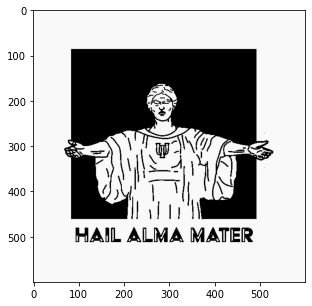

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("gray")
ax.imshow(im_copy)
plt.show()

## At this point, we will create the final bar chart that will show the most common colors from our sticker.

In [22]:
unique_colors = np.unique(sticker_data.reshape(-1,sticker_data.shape[2]), axis=0)

In [23]:
unique_colors

array([[122,  82,  67],
       [132, 170, 209],
       [249, 249, 249]], dtype=uint8)

In [24]:
num_of_pixels = []
color_labels = []
color_val = []

for icolor, rgba in enumerate(unique_colors): #loop over every unique color (count with icolor, rgba= particular color)
    #print(icolor,rgba)
    
    #creating a filtering mask for a partiicular color
    red_mask = sticker_data[:,:,0] == rgba[0] # all y pizels, all x pixels, R color == unique_color's Red channel
    green_mask = sticker_data[:,:,1] == rgba[1] #all of y pizels, all x pixels, G color == unique.colors Green chanell
    blue_mask = sticker_data[:,:,2] == rgba[2] #all of y pizels, all x pixels, B color == unique.colors Blue chanell
    #alpha_mask = im_data[:,:,3] == rgba[3] #all of y pizels, all x pixels, A color == unique.colors Alpha channel
    
    pixel_mask = red_mask & green_mask & blue_mask 
    
    # count all of the pixels of a particular color
    npixels = len(sticker_data[pixel_mask])
    print(icolor,rgba,npixels)
    
    num_of_pixels.append(npixels) #stroing the number of pixels 
    
    #store the color name for our x-axis
    
    color_labels.append("Color #"+str(icolor))
    
    color_val.append(rgba/255) #for the barchart its expecting colors between 0-1


0 [122  82  67] 36729
1 [132 170 209] 74155
2 [249 249 249] 249116


In [25]:
num_of_pixels

[36729, 74155, 249116]

In [26]:
color_val

[array([0.47843137, 0.32156863, 0.2627451 ]),
 array([0.51764706, 0.66666667, 0.81960784]),
 array([0.97647059, 0.97647059, 0.97647059])]

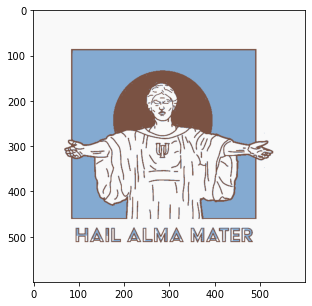

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(sticker_data)
plt.show()

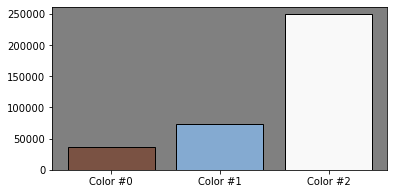

In [28]:
fig, ax = plt.subplots(figsize=(6,3))

ax.set_facecolor('gray')
myBarChart = ax.bar(color_labels, num_of_pixels) #labels , #of pixels

#loop through each bar and set it to a particular color
for i in range(len(myBarChart)): #through all bars
    myBarChart[i].set_color(color_val[i]) #setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')
plt.show()

From this bar chart, it can be seen that the most common color was white. This makes sense because Alma Mater was colored white for the sticker. The light blue and brown compose the background for the sticker.

## Second image of Alma Mater

In [29]:
#second_to_image= '/Users/joseramos/Desktop/Almamater.jpg'
path_two= '/Users/joseramos/Desktop/Almamater.jpg'

In [30]:
second_im = Image.open(path_two)

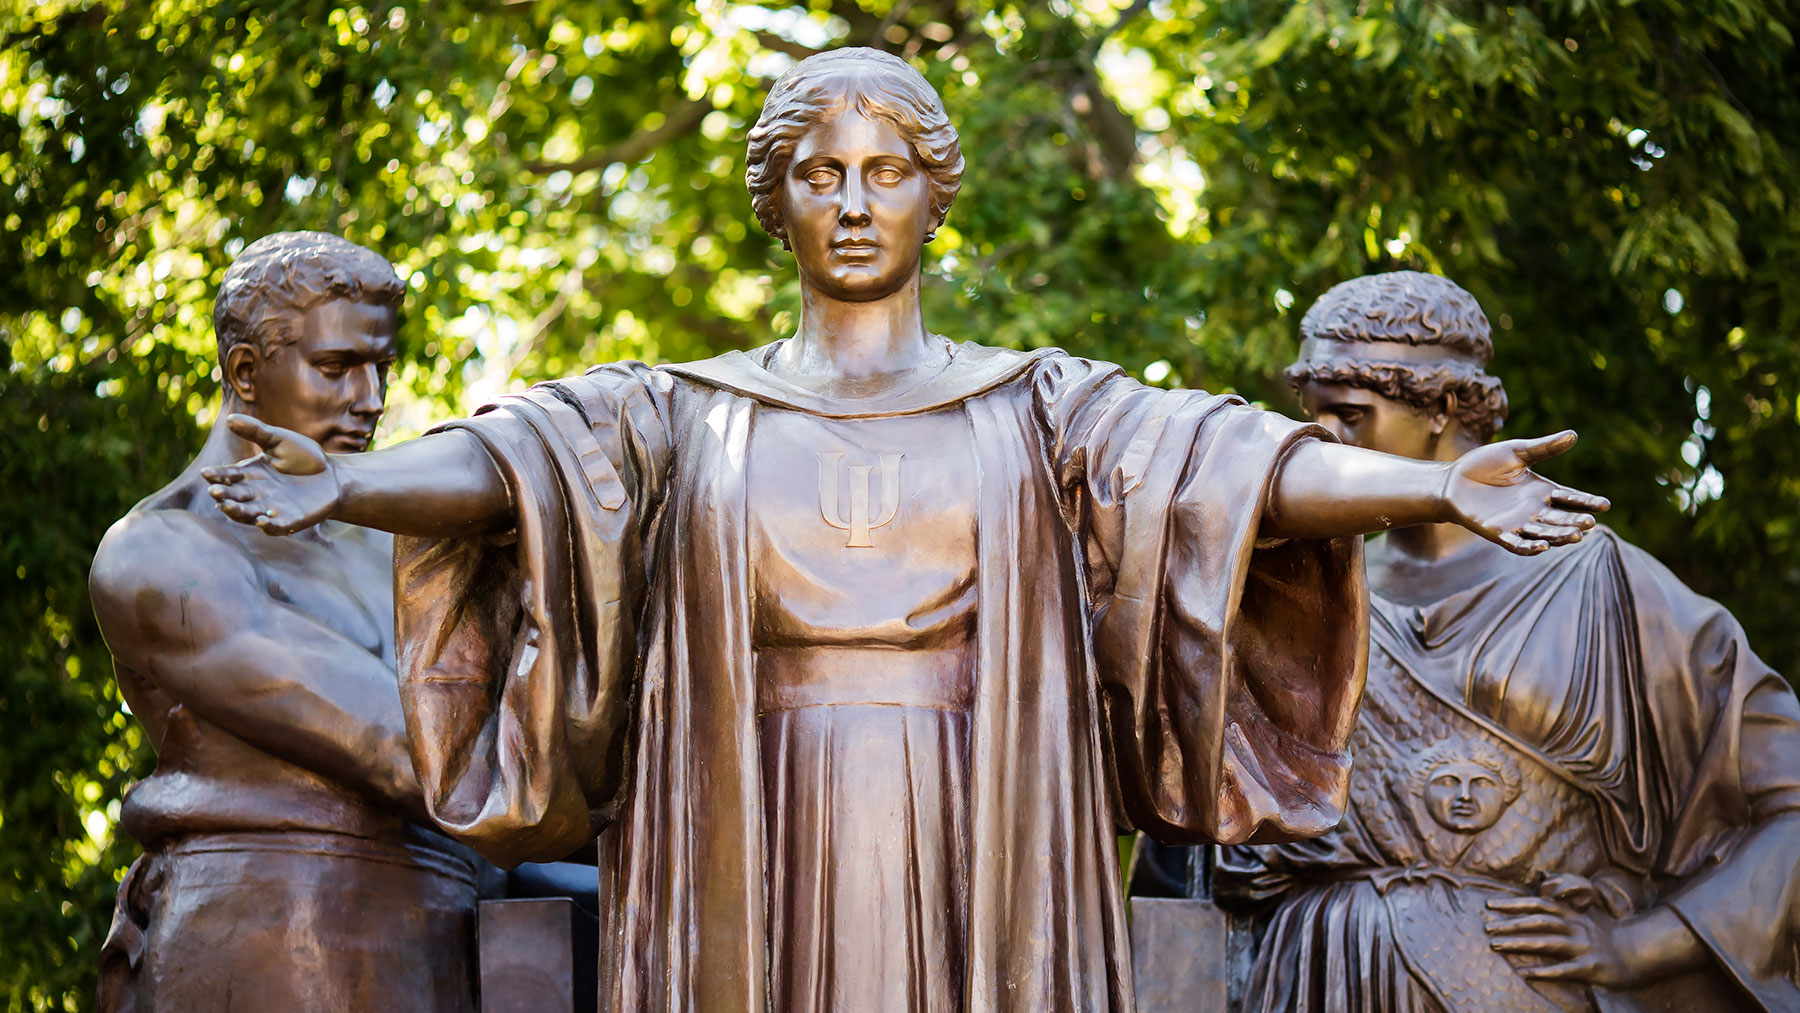

In [31]:
second_im

In [34]:
two_im, two_rgbs = convert_image(second_im, ncolors = 5)

finding 5 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[128.849444   116.24373992  67.02014865]
 [ 78.61618033  71.60347199  32.42694016]
 [159.04005913 148.70104404 144.72305068]
 [208.55551633 203.54838293 197.25944444]
 [ 31.19198589  30.50600847   7.61247531]]


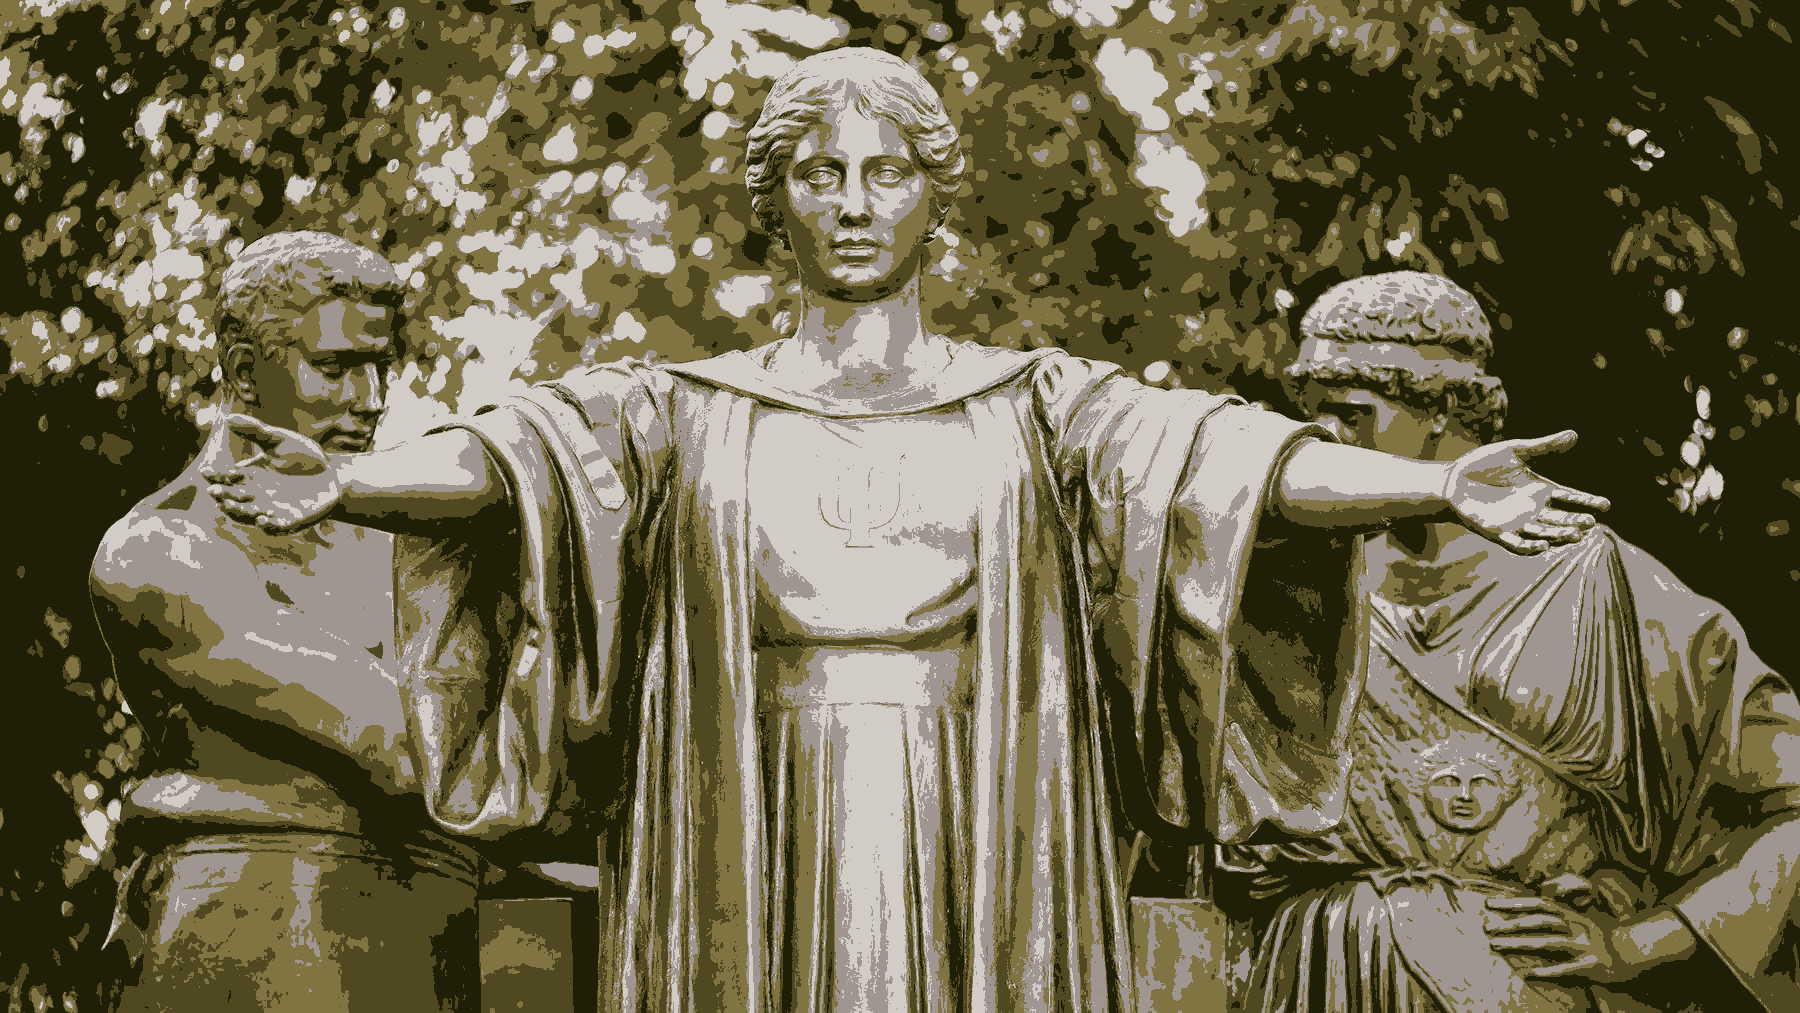

In [35]:
two_im

In this example, I have found the 8 most common colors from my picture. This picture already has much more color than my previous image.

In [36]:
sec_sticker_data = np.array(two_im)

In [37]:
sec_unique_colors = np.unique(sec_sticker_data.reshape(-1,sec_sticker_data.shape[2]), axis=0)

In [38]:
sec_unique_colors

array([[ 31,  31,   8],
       [ 79,  72,  32],
       [129, 116,  67],
       [159, 149, 145],
       [209, 204, 197]], dtype=uint8)

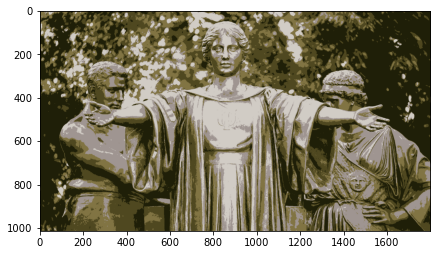

In [39]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(sec_sticker_data)
plt.show()

In [40]:
sec_channel_labels = ['R', 'G', 'B', 'A']
for i in range(sec_sticker_data.shape[2]):
    print('channel = ', sec_channel_labels[i], ', unique values=', np.unique(sec_sticker_data[:,:,i])) #print out numbers in each channel

channel =  R , unique values= [ 31  79 129 159 209]
channel =  G , unique values= [ 31  72 116 149 204]
channel =  B , unique values= [  8  32  67 145 197]


In [41]:
sec_num_of_pixels = []
sec_color_labels = []
sec_color_val = []

for icolor, rgba in enumerate(sec_unique_colors): #loop over every unique color (count with icolor, rgba= particular color)
    #print(icolor,rgba)
    
    #creating a filtering mask for a partiicular color
    red_mask = sec_sticker_data[:,:,0] == rgba[0] # all y pizels, all x pixels, R color == unique_color's Red channel
    green_mask = sec_sticker_data[:,:,1] == rgba[1] #all of y pizels, all x pixels, G color == unique.colors Green chanell
    blue_mask = sec_sticker_data[:,:,2] == rgba[2] #all of y pizels, all x pixels, B color == unique.colors Blue chanell
    #alpha_mask = im_data[:,:,3] == rgba[3] #all of y pizels, all x pixels, A color == unique.colors Alpha channel
    
    pixel_mask = red_mask & green_mask & blue_mask 
    
    # count all of the pixels of a particular color
    npixels = len(sec_sticker_data[pixel_mask])
    print(icolor,rgba,npixels)
    
    sec_num_of_pixels.append(npixels) #stroing the number of pixels 
    
    #store the color name for our x-axis
    
    sec_color_labels.append("Color #"+str(icolor))
    
    sec_color_val.append(rgba/255) #for the barchart its expecting colors between 0-1


0 [31 31  8] 474590
1 [79 72 32] 421620
2 [129 116  67] 361860
3 [159 149 145] 313079
4 [209 204 197] 252251


In [42]:
sec_num_of_pixels

[474590, 421620, 361860, 313079, 252251]

In [43]:
sec_color_val

[array([0.12156863, 0.12156863, 0.03137255]),
 array([0.30980392, 0.28235294, 0.1254902 ]),
 array([0.50588235, 0.45490196, 0.2627451 ]),
 array([0.62352941, 0.58431373, 0.56862745]),
 array([0.81960784, 0.8       , 0.77254902])]

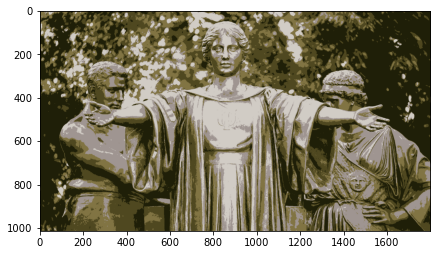

In [44]:
fig, ax =plt.subplots(figsize=(7,7))
ax.imshow(sec_sticker_data)
plt.show()

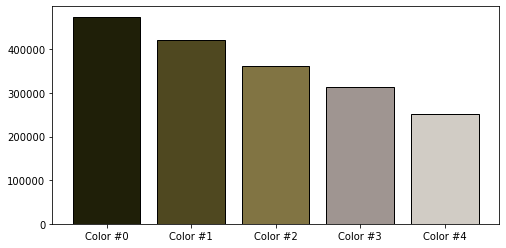

In [45]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_facecolor('white')
myBarChart = ax.bar(sec_color_labels, sec_num_of_pixels) #labels , #of pixels

#loop through each bar and set it to a particular color
for i in range(len(myBarChart)): #through all bars
    myBarChart[i].set_color(sec_color_val[i]) #setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')
plt.show()

From this graph, it can be concluded that the alma mater picture has more colors than the sticker. This also shows that the sticker had brighter colors compared to the alma mater picture. From our bar graph, it can be seen that the 2 most common colors were dark green and a color similar to black. It was interesting to see how darker colors composed the alpha mater picture.

In [46]:
third_path = '/Users/joseramos/Desktop/OrangeBlueAlma.jpg'

In [47]:
im_three = Image.open(third_path)

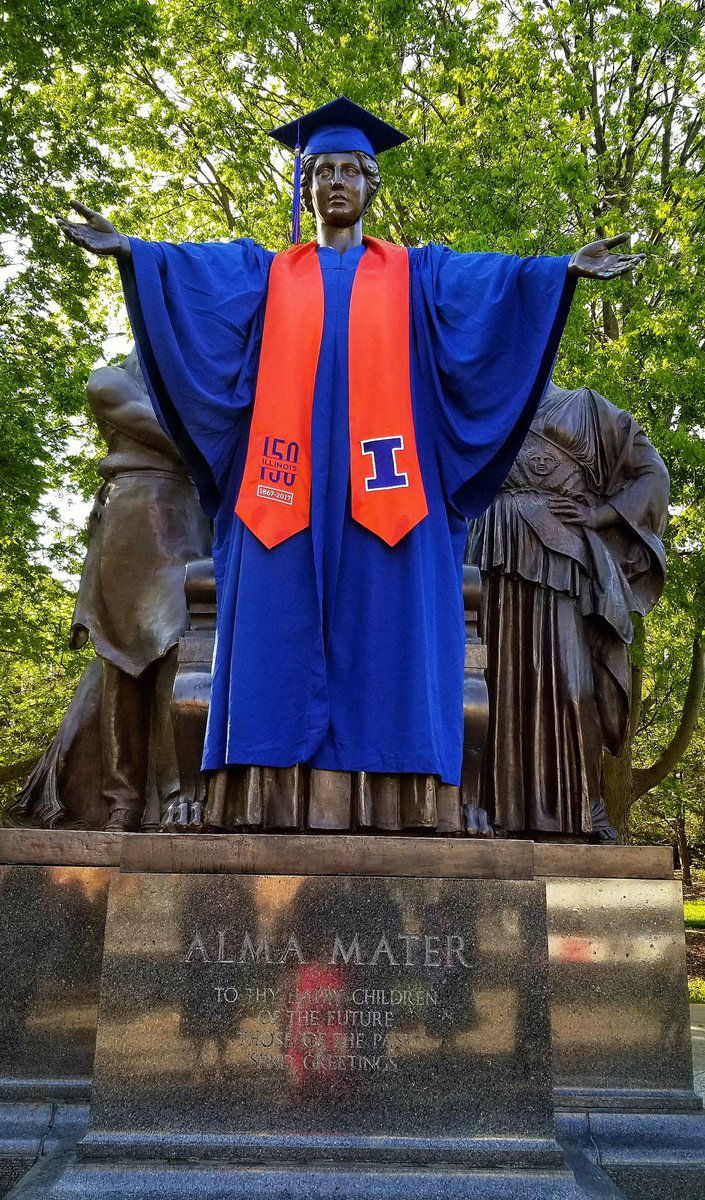

In [48]:
im_three

In [49]:
#time to find most common colors from the image 
last_im, last_rgbs = convert_image(im_three, ncolors=5) 

finding 5 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 75.90845914  78.51587585  51.6692325 ]
 [ 23.56561793  47.04253591 144.90878402]
 [ 32.07038506  31.69062481  22.85992157]
 [145.78622845 119.39501083  87.11508886]
 [215.6144632  218.74018206 175.16426792]]


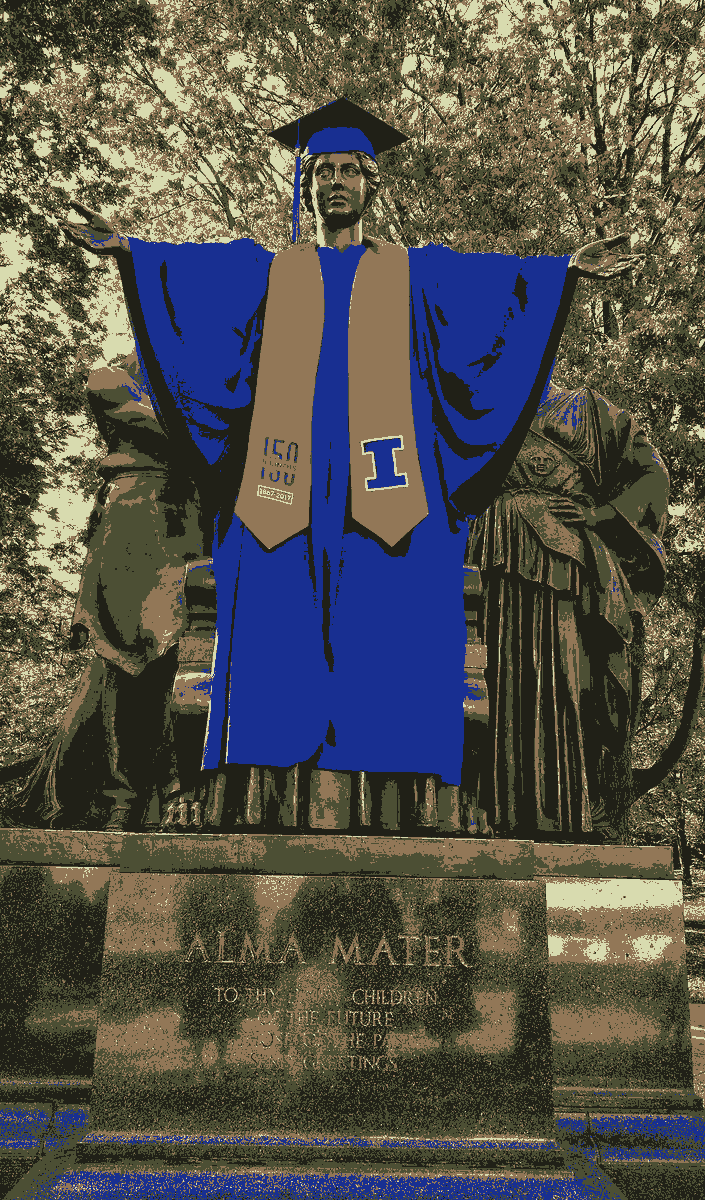

In [50]:
last_im

This image shows that the most prominent colors for this picture is blue and a very faint orange alongside a brown color

In [51]:
last_data = np.array(last_im)

In [52]:
third_unique_colors = np.unique(last_data.reshape(-1,last_data.shape[2]), axis=0)

In [53]:
third_unique_colors

array([[ 24,  47, 145],
       [ 32,  32,  23],
       [ 76,  79,  52],
       [146, 119,  87],
       [216, 219, 175]], dtype=uint8)

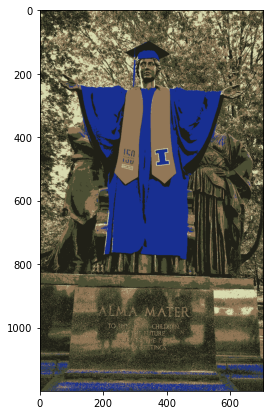

In [54]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(last_data)
plt.show()

In [55]:
third_channel_labels = ['R', 'G', 'B', 'A']
for i in range(last_data.shape[2]):
    print('channel = ', third_channel_labels[i], ', unique values=', np.unique(last_data[:,:,i])) #print out numbers in each channel

channel =  R , unique values= [ 24  32  76 146 216]
channel =  G , unique values= [ 32  47  79 119 219]
channel =  B , unique values= [ 23  52  87 145 175]


Once again, this shows that the image has no alpha value. Moving forward, I take into account that none of my images that I chose have an alpha value. (Will make edits to the code that we learned in class)

In [56]:
third_num_of_pix = []
third_color_label = []
third_color_val = []


for icolor, rgba in enumerate(third_unique_colors):
    red_mask = last_data[:,:,0] == rgba[0]
    green_mask = last_data[:,:,1] == rgba[1]
    blue_mask = last_data[:,:,2] == rgba[2]
    
    third_pix_mask = red_mask & green_mask & blue_mask
    npixels = len(last_data[third_pix_mask])
    print(icolor,rgba,npixels)
    
    third_num_of_pix.append(npixels)
    third_color_label.append("Color #" + str(icolor))
    third_color_val.append(rgba/255)

0 [ 24  47 145] 127768
1 [32 32 23] 220101
2 [76 79 52] 247903
3 [146 119  87] 188691
4 [216 219 175] 61537


In [57]:
third_num_of_pix

[127768, 220101, 247903, 188691, 61537]

In [58]:
third_color_val

[array([0.09411765, 0.18431373, 0.56862745]),
 array([0.1254902 , 0.1254902 , 0.09019608]),
 array([0.29803922, 0.30980392, 0.20392157]),
 array([0.57254902, 0.46666667, 0.34117647]),
 array([0.84705882, 0.85882353, 0.68627451])]

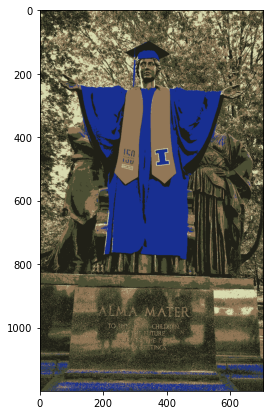

In [59]:
fig, ax = plt.subplots(figsize = (7,7))
ax.imshow(last_data)
plt.show()

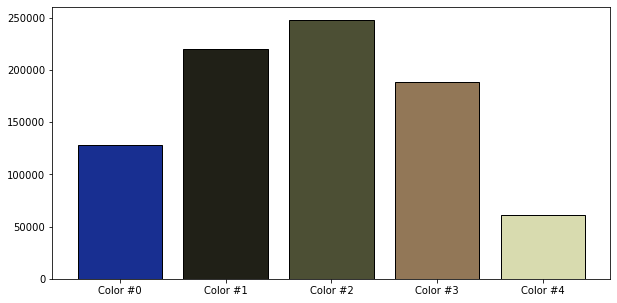

In [60]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_facecolor('white')
myThirdChart = ax.bar(third_color_label, third_num_of_pix)
for i in range(len(myThirdChart)):
    myThirdChart[i].set_color(third_color_val[i])
    myThirdChart[i].set_edgecolor("black")
plt.show()

In this final graph, we are able to see that dark green and black were the most common colors. This makes sense because the Alma Mater is composed of those colors. The background also is classfied within those colors, therefore, makes those 2 specific colors the most common. The color blue is present because of the cap and gown placed on Alma Mater. In all, these graphs showed how similar the colors of the Alma Mater are, and how dark green is one of the most prominent colors within the pictures (As expected). However, the sticker was the only picture that was a bit different since it had a different design and colors attached to it. This comes to show that even though all 3 pictures represented the same thing (Alma Mater), different designs and ideas make the images unique in their own way. The stickers(*Image 1*) that are distributed around campus, for example, are not the same color as the physical Alma Mater. This is probably because the sticker were created with the purpose to stand out more, which is why it was created with much more brigther colors. I enjoyed this part of the assignment, as it was very interesting to see the different colors of the pictures on one of the most popular landmarks on campus.

## Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?

I believe one of the issues with how color is rebinned from a full color image into an image with less colors is taking into account the many colors that may exist within an image. For many images, the colors that are present can be numerous, and perhaps it is a hard task for the program to differiantiate all those colors. In a way, perhaps the program/algorithm starts combining colors that look similar in order to give us the results on the most common colors. However, it would take a very long time to get all the specific colors and make a list about them all. As a result, by changing the images, we may lose some of the color within the images and that can affect our final picture. Furthermore, another challenge that comes to mind is the size of the image. I noticed that within by code, specifically  with the *convert_image* function, the larger the image, and the more colors we ask the program to find, the longer it will take to gain results. Therefore, if we try this set of code in a much larger, complex image, the code might run into trouble processing the image and all of its colors.